**INFO411 PROJECT GROUP 12A **

Chen Wenhui  (7431314)

Li Hao  (7436178)

Brandon Luo (7894442)

Zaw Min Thu (8222794)

Lai Wei Jie (7770042)

Introduction


# Background:

### In a 42.195km marathon, participants include both genders, and range of age groups.

### Organisers stagger start times, where Elite athletes start first, so “Difference between gun time and net time” is lesser. Conversely, slower runners have a bigger gap.

### Length of this gap could potentially be an inverse measure of ability


### In recent years, predictive modeling and statistical analysis have emerged as the cornerstone for improving various sporting activities, including scouting, tactical analysis, and performance evaluation. The essential data for these tasks are obtained from tracking systems, video analysis systems, and wearable devices. The key objective of this analysis is to thoroughly examine the position and time factors that define an athlete's experience in terms of expertise. This involves leveraging advanced statistical analysis techniques and machine learning methods. The key goal is to obtain valuable insights and contribute to the continuous improvement of athletic proficiency.

**The data**

In [ ]:
# Reading in the data for 2013
df_2013=read.csv('Melbourne13.csv')

In [ ]:
head(df_2013)

,Pos,Name,Bib.No,Time,Net.Time,Categegory,Categegory.Pos,Gender,Gender.Pos,Net.Pos,Net.Cat.Pos,Net.Gender.Pos
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>
1,1,Dominic ONDORO,11,02:10:47,02:10:47,20-39,1,Male,1,1,1,1
2,2,Yuki KAWAUCHI,7,02:11:40,02:11:40,20-39,2,Male,2,2,2,2
3,3,Dominic KIMWETICH,10,02:11:56,02:11:56,20-39,3,Male,3,3,3,3
4,4,Jonathan Kipchirchir CHESOO,1,02:12:54,02:12:54,20-39,4,Male,4,4,4,4
5,5,Peter KAMAIS,6,02:13:51,02:13:51,20-39,5,Male,5,5,5,5
6,6,Liam ADAMS,14,02:14:09,02:14:09,20-39,6,Male,6,6,6,6


In [ ]:
# Reading the 2014 data
df_14=read.csv('Melbourne14.csv')

In [ ]:
head(df_14)

,Pos,Name,Bib.No,Time,Net.Time,Categegory,Categegory.Pos,Gender,Gender.Pos,Net.Pos,Net.Cat.Pos,Net.Gender.Pos
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,1,Dominic Pius ONDORO,1,02:11:30,02:11:30,20-39,1,Male,1,1,1,1
2,2,Tewelde ESTIFANOS HIDRU,6,02:11:47,02:11:47,20-39,2,Male,2,2,2,2
3,3,Abere BELAY,7,02:12:34,02:12:34,18-19,1,Male,3,3,1,3
4,4,Edwin KORIR,5,02:13:53,02:13:53,20-39,3,Male,4,4,3,4
5,5,Samuel WOLDEAMANUAL GEBREMICHAEL,12,02:14:01,02:14:01,20-39,4,Male,5,5,4,5
6,6,Moses KIBET,8,02:14:50,02:14:50,20-39,5,Male,6,6,5,6


In [ ]:
# Reading 2015 data
df_15=read.csv('Melbourne15.csv')

In [ ]:
head(df_15)

,Pos,Name,Bib.No,Time,Net.Time,Categegory,Categegory.Pos,Gender,Gender.Pos,Net.Pos,Net.Cat.Pos,Net.Gender.Pos
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>
1,1,Brad MILOSEVIC,5,02:16:00,02:15:59,20-39,1,Male,1,1,1,1
2,2,Antony Ndungu MUGO,9,02:18:39,02:18:39,20-39,2,Male,2,2,2,2
3,3,Felix Kipkorir KANGOGO,2,02:19:22,02:19:22,20-39,3,Male,3,3,3,3
4,4,Matthew COX,11,02:20:41,02:20:41,20-39,4,Male,4,4,4,4
5,5,Stephen Kimemia NJOGU,8,02:21:13,02:21:13,20-39,5,Male,5,5,5,5
6,6,Samuel WOLDAMANUEL,5669,02:23:58,02:23:58,20-39,6,Male,6,6,6,6


In [ ]:
#  Stacking df_13,df_15 and df_15 on top of each other

df_combined <- rbind(df_2013, df_14, df_15)

In [ ]:
head(df_combined)

,Pos,Name,Bib.No,Time,Net.Time,Categegory,Categegory.Pos,Gender,Gender.Pos,Net.Pos,Net.Cat.Pos,Net.Gender.Pos
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,1,Dominic ONDORO,11,02:10:47,02:10:47,20-39,1,Male,1,1,1,1
2,2,Yuki KAWAUCHI,7,02:11:40,02:11:40,20-39,2,Male,2,2,2,2
3,3,Dominic KIMWETICH,10,02:11:56,02:11:56,20-39,3,Male,3,3,3,3
4,4,Jonathan Kipchirchir CHESOO,1,02:12:54,02:12:54,20-39,4,Male,4,4,4,4
5,5,Peter KAMAIS,6,02:13:51,02:13:51,20-39,5,Male,5,5,5,5
6,6,Liam ADAMS,14,02:14:09,02:14:09,20-39,6,Male,6,6,6,6


In [ ]:
#install.packages('dplyr')
library(dplyr)

In [ ]:
# Dropping duplicates in the dataset
df_combined=distinct(df_combined)

In [ ]:
dim(df_combined)

[1] 19504    12

In [ ]:
length(unique(df_combined$Name))

[1] 15741


The dataset used in this analysis combines information from three distinct datasets, comprising a 42.195-kilometer Australian marathon spanning three consecutive years from 2013 to 2015. It consists of 12 variables that capture the attributes of various athletes throughout this time span. With a total of 19,504 entries containing athletes' characteristics, the dataset demonstrates 15,741 unique entries, implying the repeated participation in the marathon over multiple years. Among the notable variables describing athlete characteristics, two stand out:

**Net Time:** The duration between crossing the finish line and crossing the start line.

**Gun Time:** The time elapsed from crossing the finish line to the firing of the starting gun.
These two variables are expected to play a pivotal role in accomplishing the objectives of this analysis, as they demonstrate the expertise of athletes, distinguishing them between amateur or expert.


**Methods**

**Feature engineering**

In order to measure athletes' relative performance within their category accounting for the total number of participant per age  category a feature known as Relative Position(RelPos) was created.The feature is a normalized measure of of an athlete's performance within their age category enabling fair comparisons across different age groups.This variable provides insights into an athlete's standing relative to others in the same category accounting for variations in category sizes.It also provides a measure of how an athlete's position compares to the highest position achieved within their respective age category.


Within the combined dataframe, there are atheletes who "DNF", did not finish, observations with blank or missing data, and rows with NA values.

We proceed to remove these observations, leaving us 19,317 observations.

In [ ]:
library(dplyr)
library(ggplot2)
library(stringr)

In [ ]:
#Creating the relative position column
# Omitting the missing values in the Categegory.Pos column

# Remove rows where Categegory.Pos = 0
df_combined <- df_combined %>%
  filter(Categegory.Pos != "0")

# Omitting the rows where Categegory.Pos is an empty string
df_combined <- df_combined %>%
  filter(Categegory.Pos != "")

# Omitting the missing values in the Categegory.Pos column
df_combined <- df_combined %>%
  filter(!is.na(Categegory.Pos))

# Converting the category variable into factors
df_combined$Categegory <- factor(as.character(df_combined$Categegory), levels =as.character(unique(df_combined$Categegory)))
df_combined$num.in.class <- ave(as.numeric(df_combined$Categegory.Pos), df_combined$Categegory, FUN =
                                  max)
df_combined=na.omit(df_combined)
df_combined$RelPos <- ( as.numeric(df_combined$num.in.class) - as.numeric(df_combined$Categegory.Pos)) / ( as.numeric(df_combined$num.in.class) -
                                                                                                            1)
dim(df_combined)

Warning message in split(x, g):
“NAs introduced by coercion”


[1] 19317    14

Another feature known as time difference which is the difference between **net time** and **gun time** was created.This distinguishes between elite athletes and non elite athletes since Elite athletes cross the start line first, so that their “net” time is very similar to the “gun” or “official” time hence a very small time difference.This feature would be very crucial in conducting statistical analysis or predictive modelling of the relative position of an athlete.

In [ ]:
# Creating the time_difference variable
df_combined$Net.Time <- as.POSIXlt(strptime(df_combined$Net.Time, format="%H:%M:%S"))
df_combined$Time <- as.POSIXlt(strptime(df_combined$Time, format="%H:%M:%S"))
df_combined$time_difference <- as.numeric(difftime(df_combined$Time,df_combined$Net.Time,units = "secs"))

In [ ]:
head(df_combined)

,Pos,Name,Bib.No,Time,Net.Time,Categegory,Categegory.Pos,Gender,Gender.Pos,Net.Pos,Net.Cat.Pos,Net.Gender.Pos,num.in.class,RelPos,time_difference
,<chr>,<chr>,<chr>,<dttm>,<dttm>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,Dominic ONDORO,11,2024-02-07 02:10:47,2024-02-07 02:10:47,20-39,1,Male,1,1,1,1,2677,1.0000000,0
2,2,Yuki KAWAUCHI,7,2024-02-07 02:11:40,2024-02-07 02:11:40,20-39,2,Male,2,2,2,2,2677,0.9996263,0
3,3,Dominic KIMWETICH,10,2024-02-07 02:11:56,2024-02-07 02:11:56,20-39,3,Male,3,3,3,3,2677,0.9992526,0
4,4,Jonathan Kipchirchir CHESOO,1,2024-02-07 02:12:54,2024-02-07 02:12:54,20-39,4,Male,4,4,4,4,2677,0.9988789,0
5,5,Peter KAMAIS,6,2024-02-07 02:13:51,2024-02-07 02:13:51,20-39,5,Male,5,5,5,5,2677,0.9985052,0
6,6,Liam ADAMS,14,2024-02-07 02:14:09,2024-02-07 02:14:09,20-39,6,Male,6,6,6,6,2677,0.9981315,0


**Visualisations**

In [ ]:
library(ggplot2)

### Distribution of Age Groups

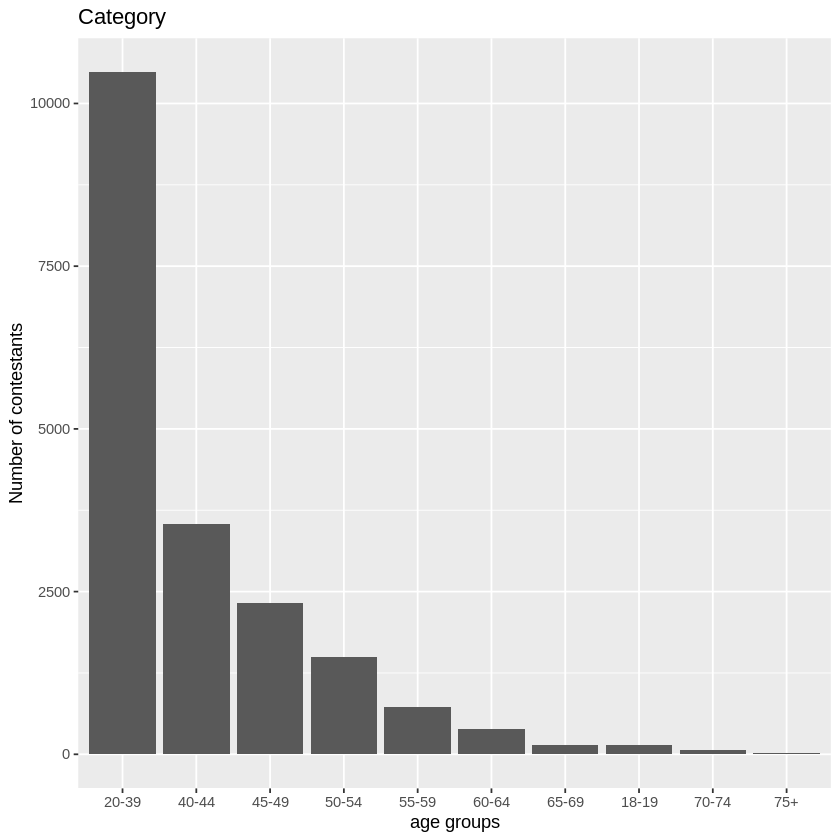

In [ ]:
ggplot(df_combined, aes(x = Categegory)) +geom_bar() +
  labs(title = "Category", x = "age groups", y = "Number of contestants")


###Through this plot,can observe the net time distribution of athletes in different age groups during the game. We can understand the distribution of data by observing trends, concentrations, outliers,in the plot.

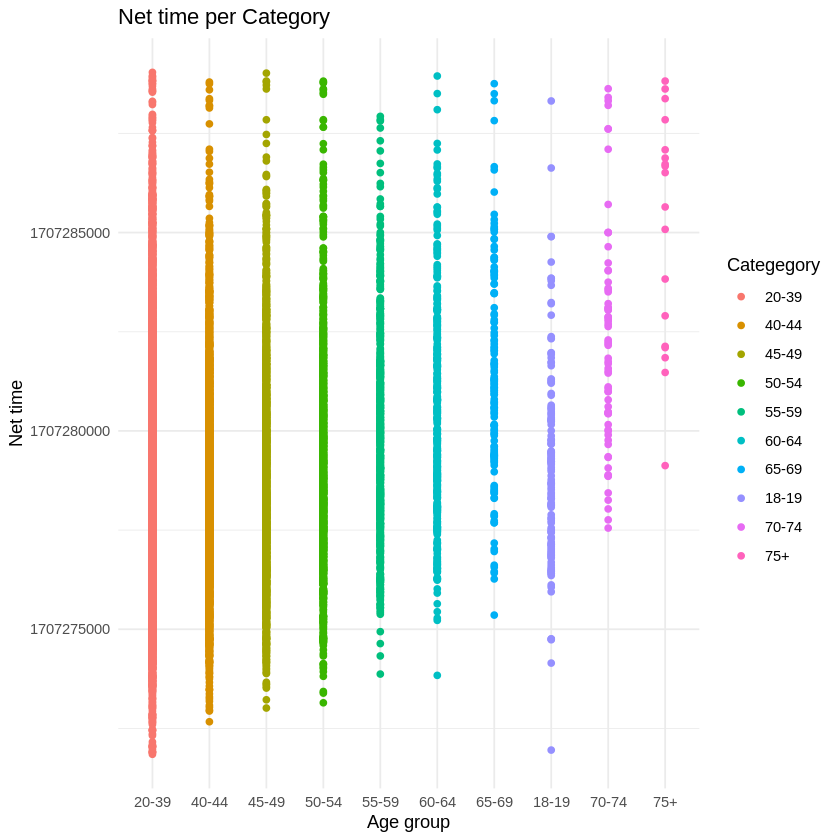

In [ ]:
# Convert Net.Time to numeric
df_combined$Net.Time <- as.numeric(df_combined$Net.Time)

# Plot the data
ggplot(df_combined, aes(x = Categegory, y = Net.Time, color = Categegory)) +
  geom_point() +
  labs(title = "Net time per Category",
       x = "Age group",
       y = "Net time") +
  theme_minimal()

### Histogram of relative positions
### Through this plot, you can see where the relative positions of the data are concentrated,and whether there are outliers or special trends.

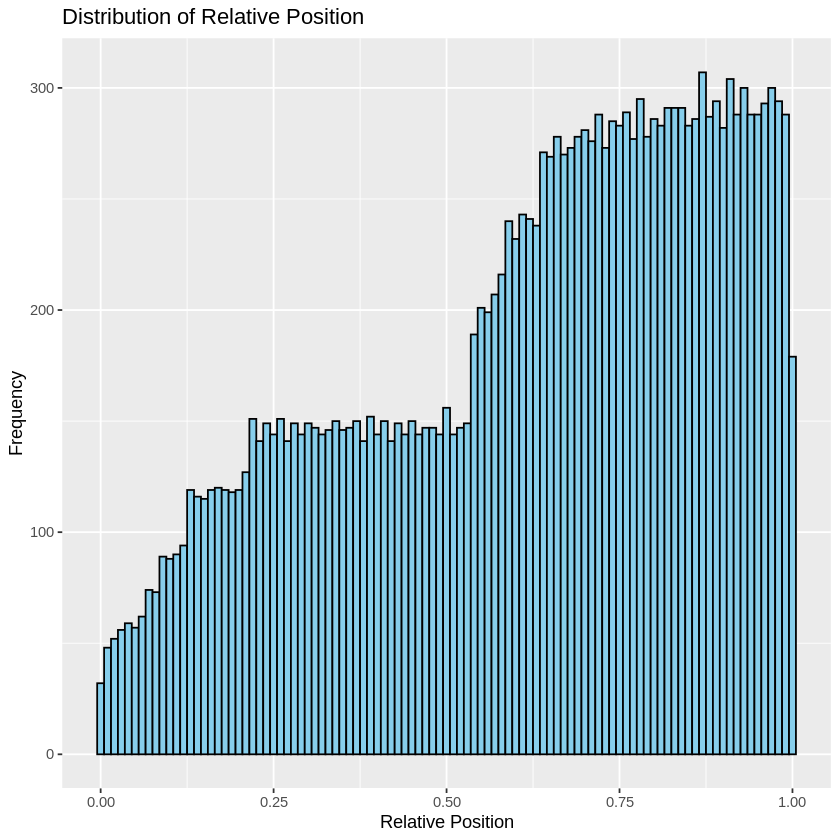

In [ ]:
ggplot(df_combined, aes(x = RelPos)) +
  geom_histogram(binwidth = 0.01, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Relative Position",
       x = "Relative Position",
       y = "Frequency")

In [ ]:
# Load the tidyr package
library(tidyr)


In [ ]:
# Convert to numeric type
df_combined$Gender <- as.numeric(factor(df_combined$Gender, levels = c("Female", "Male"), labels = c(0, 1)))
df_combined$Categegory <- as.numeric(factor(df_combined$Categegory))
df_combined$Categegory.Pos <- as.numeric(factor(df_combined$Pos))

# Correlation matrix
cor_matrix <- cor(df_combined[c("RelPos", "Gender", "Categegory", "time_difference")])

# Convert correlation matrix to data frame
cor_df <- as.data.frame(cor_matrix)

# Add rownames as a column
cor_df$variable <- rownames(cor_df)

# Reshape the data into long format
cor_data <- reshape(cor_df, varying = list(names(cor_df)[-ncol(cor_df)]),
                    v.names = "correlation", direction = "long",
                    times = names(cor_df)[-ncol(cor_df)],
                    timevar = "variable2", idvar = "variable")

# Sort the absolute values of correlations
sorted_cor <- cor_data[order(abs(cor_data$correlation), decreasing = TRUE), ]

# Print the sorted list
print(sorted_cor)


                                       variable       variable2 correlation
RelPos.RelPos                            RelPos          RelPos  1.00000000
Gender.Gender                            Gender          Gender  1.00000000
Categegory.Categegory                Categegory      Categegory  1.00000000
time_difference.time_difference time_difference time_difference  1.00000000
Gender.RelPos                            Gender          RelPos -0.44421298
RelPos.Gender                            RelPos          Gender -0.44421298
time_difference.RelPos          time_difference          RelPos -0.34748022
RelPos.time_difference                   RelPos time_difference -0.34748022
time_difference.Gender          time_difference          Gender -0.11444266
Gender.time_difference                   Gender time_difference -0.11444266
Categegory.Gender                    Categegory          Gender  0.08573260
Gender.Categegory                        Gender      Categegory  0.08573260
Categegory.R

### Heatmap
### This plot shows the correlation between some attributes and relative positions

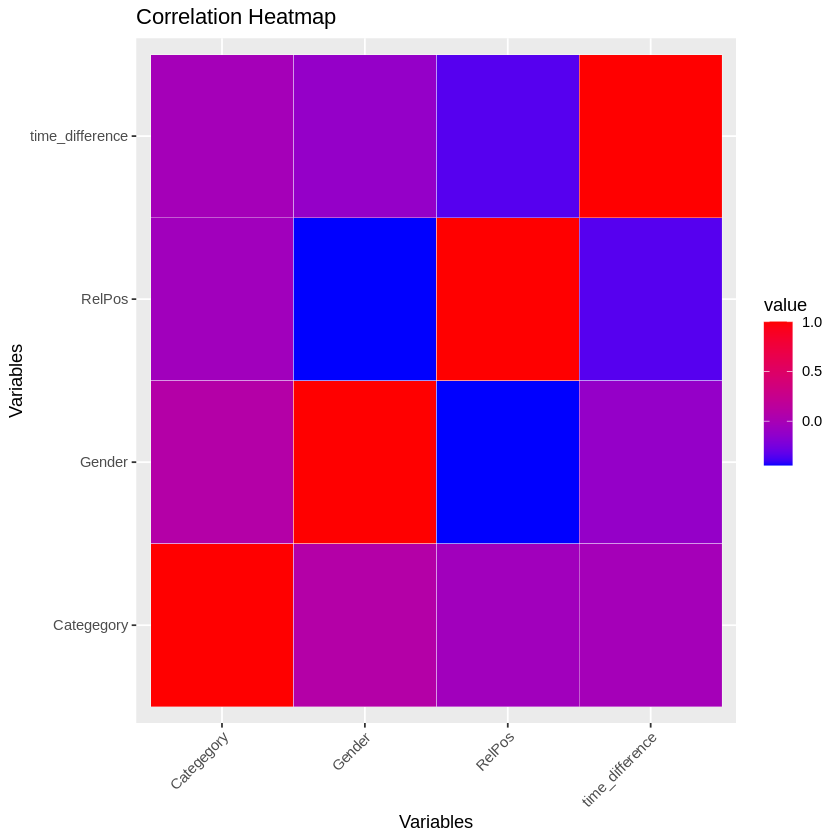

In [ ]:
# Rename columns to Var1 and Var2
names(cor_data) <- c("Var1", "Var2", "value")

# Plot the correlation heatmap
ggplot(cor_data, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "blue", high = "red") +
  labs(title = "Correlation Heatmap", x = "Variables", y = "Variables") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))



### Distribution of Time Variables vs RelPos

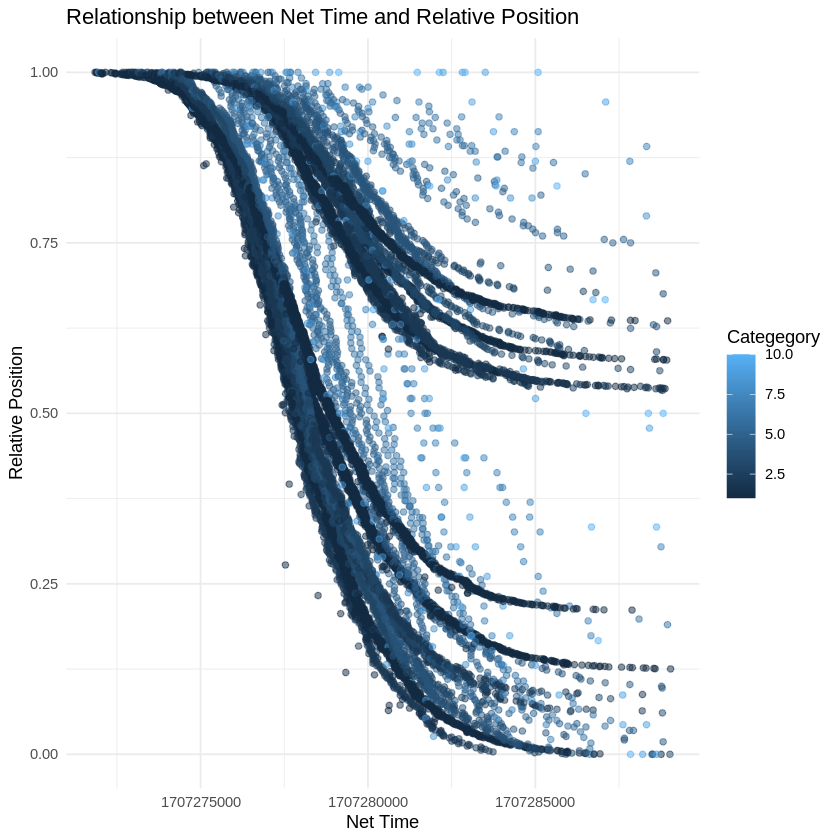

In [ ]:
#The relationship between net time and relative position
ggplot(df_combined, aes(x = Net.Time, y = RelPos, color = Categegory)) +
  geom_point(alpha = 0.5) + labs(title = "Relationship between Net Time and Relative Position",
       x = "Net Time",
       y = "Relative Position") + theme_minimal()

df_combined$Time <- as.POSIXct(df_combined$Time, format = "%H:%M:%S")


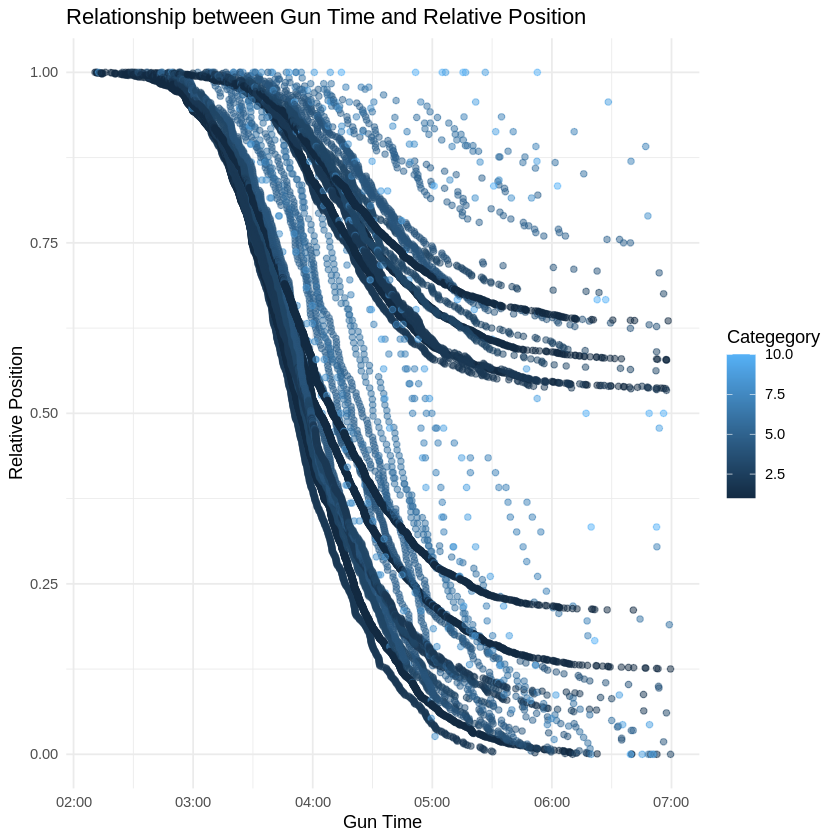

In [ ]:
df_combined$Time <- as.POSIXct(df_combined$Time, format = "%H:%M:%S")


#The relationship between gun time and relative position
ggplot(df_combined, aes(x = Time, y = RelPos, color = Categegory)) +
  geom_point(alpha = 0.5) + labs(title = "Relationship between Gun Time and Relative Position",
                                 x = "Gun Time",
                                 y = "Relative Position") + theme_minimal()


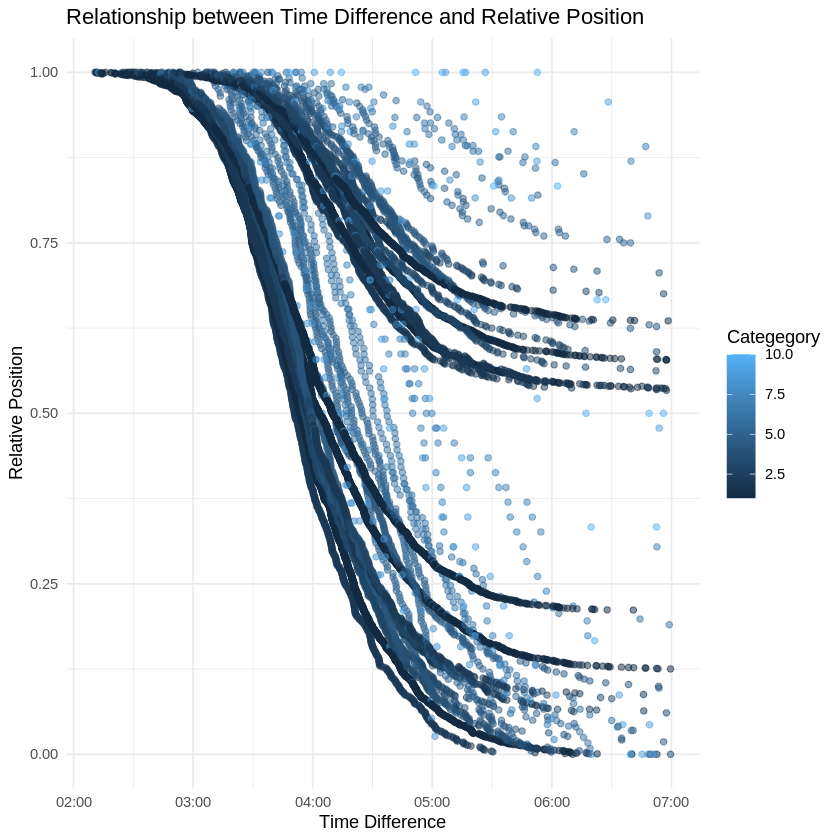

In [ ]:
df_combined$time_difference <- as.POSIXct(df_combined$Time, format = "%H:%M:%S")

#The relationship gap between net time and gun time and relative position
ggplot(df_combined, aes(x = time_difference, y = RelPos, color = Categegory)) +
  geom_point(alpha = 0.5) + labs(title = "Relationship between Time Difference and Relative Position",
                                 x = "Time Difference",
                                 y = "Relative Position") + theme_minimal()

**Predictive analytics**

To accomplish one of the objectives of this analysis,two distinct machine learning algoriithms to predict the relative position variable, which acts as an extensive measure of an athlete's athletic prowess.A detailed analysis was conducted between two tree-based machine learning models,selected due to their efficiency in handling ordinal categorical variables.

**Xgboost algorithm**

To achieve the goals of this analysis the xgboost algorithm was one of the algorithms  used to predict the
relative position of an athlete.This was due to its high predictive accuracy that has led to many teams winning Kaggle competitions on predictive analytics after leveraging it for prediction.The Xgboost algorithm works by iteratively  building a collection of weak learners typically, decision trees and combining their predictions to improve their overall accuracy.During each iteration,the xgboost algorithm fits a new tree to the residuals of the previous iteration,placing more emphasis on poorly predicted instances.Iteration is done till a predefined number of trees is reached.Xgboost also leverages employs regularization techniques to prevent overfitting thus enhancing its accuracy.However xgboost algorithm has a disadvantage that its interpretability can be more challenging due to its ensemble nature.

In [ ]:
# Installing the tidymodels package for fitting machine learning algorithms
install.packages("tidymodels")
library(tidymodels)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future.apply’, ‘lava’, ‘prodlim’, ‘ipred’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tibble       3.2.1
✔ infer        1.0.6     ✔ tune         1.1.2
✔ modeldata    1.3.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.3.0
✔ recipes      1.0.9     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ recipes::fixed() masks stringr::fixed()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



In [ ]:
# tidymodels
library(rsample)
library(recipes)
library(parsnip)
library(tune)
library(dials)
library(workflows)
library(yardstick)

In [ ]:
# Categorical variable of the category column
df_combined=df_combined %>% mutate(Categegory=recode(Categegory,
'18-19'=2,'20-39'=1,'40-44'=3,'45-49'=4,'50-54'=5,'55-59'=6,'60-64'=7,'65-69'=8,'70-74'=9,'75+'=10))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Categegory = recode(...)`.
Caused by warning in `recode.numeric()`:
! NAs introduced by coercion”


In [ ]:
df_combined<- df_combined %>%
  mutate(Gender = recode(Gender, "Female" = 0, "Male" = 1))


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Gender = recode(Gender, Female = 0, Male = 1)`.
Caused by warning in `recode.numeric()`:
! NAs introduced by coercion”


In [ ]:
#   Selecting variables
df_predict=df_combined[,c('Gender','Categegory','time_difference','RelPos')]

In [ ]:
df_predict$Gender=as.factor(df_predict$Gender)
df_predict$Categegory=as.numeric(df_predict$Categegory)
df_predict$time_difference=as.numeric(df_predict$time_difference)
df_predict$RelPos=as.numeric(df_predict$RelPos)

In [ ]:
head(df_predict)

,Gender,Categegory,time_difference,RelPos
,<fct>,<dbl>,<dbl>,<dbl>
1,2,1,1707271847,1.0000000
2,2,1,1707271900,0.9996263
3,2,1,1707271916,0.9992526
4,2,1,1707271974,0.9988789
5,2,1,1707272031,0.9985052
6,2,1,1707272049,0.9981315


In [ ]:
# split into training and testing datasets. Stratify by Sale price
df_predict_split <- rsample::initial_split(
  df_predict,
  prop = 0.8,
  strata = Gender
)


In [ ]:
# preprocessing "recipe"
preprocessing_recipe <-
  recipes::recipe(RelPos ~ ., data = training(df_predict_split)) %>%
  # convert categorical variables to factors
  recipes::step_string2factor(all_nominal()) %>%
  # combine low frequency factor levels
  recipes::step_other(all_nominal(), threshold = 0.01) %>%
  # remove no variance predictors which provide no predictive information
  recipes::step_nzv(all_nominal()) %>%
  prep()

In [ ]:
df_predict_cv_folds <-
  recipes::bake(
    preprocessing_recipe,
    new_data = training(df_predict_split)
  ) %>%
  rsample::vfold_cv(v = 5)

In [ ]:
# XGBoost model specification
xgboost_model <-
  parsnip::boost_tree(
    mode = "regression",
    trees = 1000,
    min_n = tune(),
    tree_depth = tune(),
    learn_rate = tune(),
    loss_reduction = tune()
  ) %>%
    set_engine("xgboost", objective = "reg:squarederror")

In [ ]:
# grid specification
xgboost_params <-
  dials::parameters(
    min_n(),
    tree_depth(),
    learn_rate(),
    loss_reduction()
  )

In [ ]:
xgboost_grid <-
  dials::grid_max_entropy(
    xgboost_params,
    size = 60
  )

knitr::kable(head(xgboost_grid))



| min_n| tree_depth| learn_rate| loss_reduction|
|-----:|----------:|----------:|--------------:|
|    32|          6|  0.0000428|      0.0000014|
|    21|         12|  0.0000023|      0.0000360|
|    20|          3|  0.0002255|      0.0021629|
|    38|          8|  0.0935548|      0.0021395|
|    33|          5|  0.0000202|      0.0653168|
|    32|          2|  0.0000001|      0.0000641|

In [ ]:
xgboost_wf <-
  workflows::workflow() %>%
  add_model(xgboost_model) %>%
  add_formula(RelPos ~ .)

In [ ]:
install.packages('xgboost')
library('xgboost')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [ ]:
df_predict$Gender=as.numeric(df_predict$Gender)

In [ ]:
# hyperparameter tuning
xgboost_tuned <- tune::tune_grid(
  object = xgboost_wf,
  resamples = df_predict_cv_folds,
  grid = xgboost_grid,
  metrics = yardstick::metric_set(rmse, mae),
  control = tune::control_grid(verbose = TRUE)
)

i Fold1: preprocessor 1/1

✓ Fold1: preprocessor 1/1

i Fold1: preprocessor 1/1, model 1/60

✓ Fold1: preprocessor 1/1, model 1/60

i Fold1: preprocessor 1/1, model 1/60 (extracts)

i Fold1: preprocessor 1/1, model 1/60 (predictions)

i Fold1: preprocessor 1/1, model 2/60

✓ Fold1: preprocessor 1/1, model 2/60

i Fold1: preprocessor 1/1, model 2/60 (extracts)

i Fold1: preprocessor 1/1, model 2/60 (predictions)

i Fold1: preprocessor 1/1, model 3/60

✓ Fold1: preprocessor 1/1, model 3/60

i Fold1: preprocessor 1/1, model 3/60 (extracts)

i Fold1: preprocessor 1/1, model 3/60 (predictions)

i Fold1: preprocessor 1/1, model 4/60

✓ Fold1: preprocessor 1/1, model 4/60

i Fold1: preprocessor 1/1, model 4/60 (extracts)

i Fold1: preprocessor 1/1, model 4/60 (predictions)

i Fold1: preprocessor 1/1, model 5/60

✓ Fold1: preprocessor 1/1, model 5/60

i Fold1: preprocessor 1/1, model 5/60 (extracts)

i Fold1: preprocessor 1/1, model 5/60 (predictions)

i Fold1: preprocessor 1/1, model 6/60

✓ 

In [ ]:
xgboost_tuned %>%
  tune::show_best(metric = "rmse") %>%
  knitr::kable()



| min_n| tree_depth| learn_rate| loss_reduction|.metric |.estimator |      mean|  n|   std_err|.config               |
|-----:|----------:|----------:|--------------:|:-------|:----------|---------:|--:|---------:|:---------------------|
|     9|          7|  0.0065318|      0.0001854|rmse    |standard   | 0.0454441|  5| 0.0005226|Preprocessor1_Model57 |
|    38|          8|  0.0935548|      0.0021395|rmse    |standard   | 0.0457530|  5| 0.0007057|Preprocessor1_Model04 |
|    33|         12|  0.0190627|      0.0000000|rmse    |standard   | 0.0459776|  5| 0.0007516|Preprocessor1_Model35 |
|    36|          4|  0.0248334|      0.0000005|rmse    |standard   | 0.0460461|  5| 0.0007827|Preprocessor1_Model34 |
|     3|         13|  0.0249807|      0.0005488|rmse    |standard   | 0.0460551|  5| 0.0004117|Preprocessor1_Model47 |

In [ ]:
xgboost_best_params <- xgboost_tuned %>%
  tune::select_best("rmse")

knitr::kable(xgboost_best_params)



| min_n| tree_depth| learn_rate| loss_reduction|.config               |
|-----:|----------:|----------:|--------------:|:---------------------|
|     9|          7|  0.0065318|      0.0001854|Preprocessor1_Model57 |

In [ ]:
xgboost_model_final <- xgboost_model %>%
  finalize_model(xgboost_best_params)

In [ ]:
train_processed <- bake(preprocessing_recipe,  new_data = training(df_predict_split))

train_prediction <- xgboost_model_final %>%
  # fit the model on all the training data
  fit(
    formula = RelPos ~ .,
    data    = train_processed
  ) %>%
  # predict the sale prices for the training data
  predict(new_data = train_processed) %>%
  bind_cols(training(df_predict_split))

xgboost_score_train <-
  train_prediction %>%
  yardstick::metrics(RelPos, .pred) %>%
  mutate(.estimate = format(round(.estimate, 2), big.mark = ","))

In [ ]:
test_processed  <- bake(preprocessing_recipe, new_data = testing(df_predict_split))

test_prediction <- xgboost_model_final %>%
  # fit the model on all the training data
  fit(
    formula = RelPos ~ .,
    data    = train_processed
  ) %>%
  # use the training model fit to predict the test data
  predict(new_data = test_processed) %>%
  bind_cols(testing(df_predict_split))

# measure the accuracy of our model using `yardstick`
xgboost_score <-
  test_prediction %>%
  yardstick::metrics(RelPos, .pred) %>%
  mutate(.estimate = format(round(.estimate, 2), big.mark = ","))

knitr::kable(xgboost_score)



|.metric |.estimator |.estimate |
|:-------|:----------|:---------|
|rmse    |standard   |0.04      |
|rsq     |standard   |0.97      |
|mae     |standard   |0.03      |


 A Mean Absolute Error (MAE) of 0.14 indicates that, on average, the model's predictions of RelativePos are off by approximately 0.14 units from
 the actual values. 0.14 would generally be considered fair performance, as it suggests that the xgboost model made reasonably accurate predictions, with the average error being relatively small.

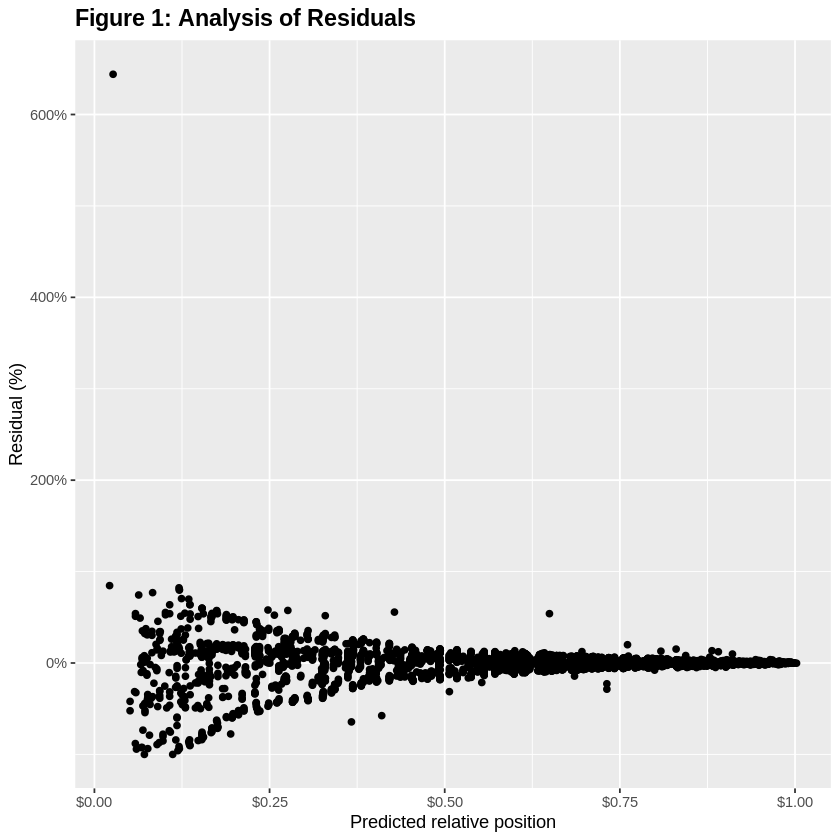

In [ ]:
position_prediction_residual <- test_prediction %>%
  arrange(.pred) %>%
  mutate(residual_pct = (RelPos - .pred) / .pred) %>%
  select(.pred, residual_pct)

ggplot(position_prediction_residual, aes(x = .pred, y = residual_pct)) +
  geom_point() +
  xlab("Predicted relative position") +
  ylab("Residual (%)") +
  scale_x_continuous(labels = scales::dollar_format()) +
  scale_y_continuous(labels = scales::percent)+
  ggtitle("Figure 1: Analysis of Residuals")+theme(plot.title = element_text(size = 14, face = "bold"))

Figure 1 does not show any super obvious trends in the residuals. This indicates that, at a very high level, the xgboost model is not systematically making inaccurate predictions for the relative position with certain predicted relative position values.This indicates its reliability in prediction of the relative position variable.

**RandomForest**

To achieve the goals of this analysis a random forest model was leveraged.The random forest model was used to predict the relative position.The choice of a random forest was motivated by the fact that it has less hyperparameters to tune.Random Forest is an ensembe machine learning model that builds decision trees during training and outputs mean prediction of individual trees as its final prediction in regression problems.During prediction, each tree in the forest independently predicts the dependent variable and the final prediction is determined by an aggregation of individual predictions.This algorithm has some drawbacks in the sense that it might be computationally expensive where a large number of variables is involved.

In [ ]:
install.packages('randomForest')
install.packages('resample')
install.packages('caret')
install.packages('h2o')
install.packages('ranger')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘RCurl’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




In [ ]:
library(rsample)      # data splitting
library(randomForest) # basic implementation
library(ranger)       # a faster implementation of randomForest
library(caret)        # an aggregator package for performing many machine learning models
library(h2o)          # an extremely fast java-based platform

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘ranger’


The following object is masked from ‘package:randomForest’:

    importance


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:purrr’:

    lift



----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit https://docs.h2o.ai

----------------------------------------------------------------------



Attaching package: ‘h2o’


Th

In [ ]:
head(df_predict)

,Gender,Categegory,time_difference,RelPos
,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1,1707271847,1.0000000
2,2,1,1707271900,0.9996263
3,2,1,1707271916,0.9992526
4,2,1,1707271974,0.9988789
5,2,1,1707272031,0.9985052
6,2,1,1707272049,0.9981315


In [ ]:
# Create features and target
X <- df_predict %>%
  select(Gender,Categegory,time_difference)
y <- df_predict$RelPos

In [ ]:
# Split data into training and test sets
index <- createDataPartition(y, p=0.75, list=FALSE)
X_train <- X[ index, ]
X_test <- X[-index, ]
y_train <- y[index]
y_test<-y[-index]

In [ ]:
regr <- randomForest(x = X_train, y = y_train , maxnodes = 10, ntree = 10)

In [ ]:
# Make prediction
predictions <- predict(regr, X_test)
result <- X_test
result['RelPos'] <- y_test
result['prediction']<-  predictions
head(result)

,Gender,Categegory,time_difference,RelPos,prediction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,2,1,1707271916,0.9992526,0.689972
8,2,1,1707272711,0.9973842,0.689972
11,2,1,1707272794,0.9966368,0.689972
12,2,1,1707272821,0.9962631,0.689972
14,2,1,1707272934,0.9958894,0.689972
18,2,1,1707273024,0.9951420,0.689972


In [ ]:
head(X_test)

,Gender,Categegory,time_difference
,<dbl>,<dbl>,<dbl>
3,2,1,1707271916
8,2,1,1707272711
11,2,1,1707272794
12,2,1,1707272821
14,2,1,1707272934
18,2,1,1707273024


In [ ]:
install.packages('ggthemes')
library(ggthemes)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



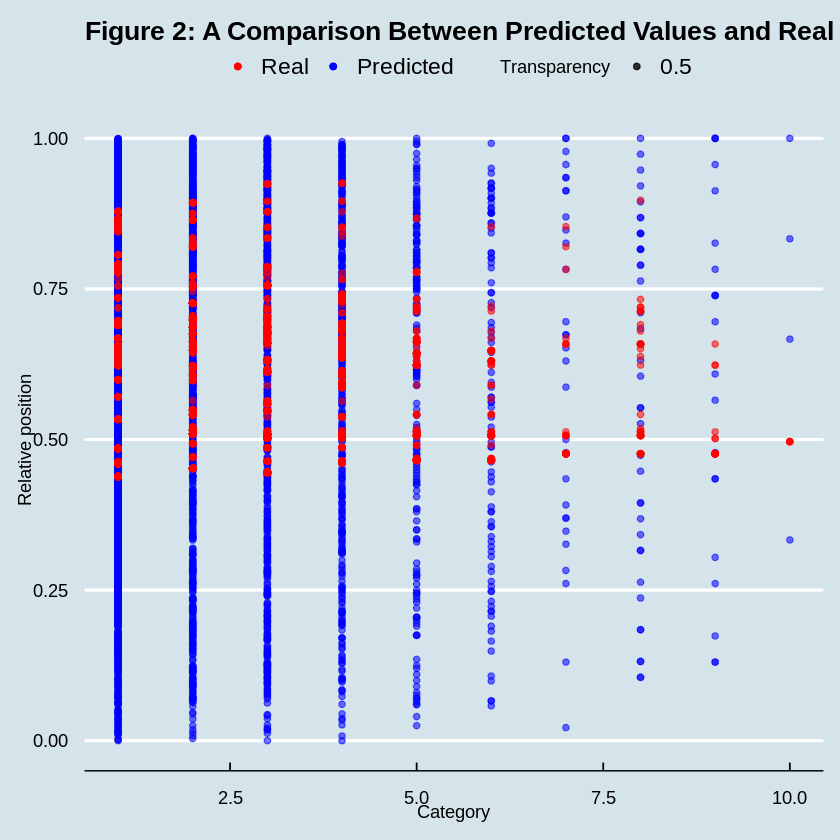

In [ ]:
ggplot() +
  geom_point(aes(x = X_test$Categegory, y = y_test, color = 'Real', alpha = 0.5)) +
  geom_point(aes(x = X_test$Categegory, y = predictions, color = 'Predicted', alpha = 0.5)) +
  labs(x = "Category", y = "Relative position", color = "", alpha = 'Transparency') +
  scale_color_manual(labels = c("Real", "Predicted"), values = c("red", "blue")) +
  ggtitle("Figure 2: A Comparison Between Predicted Values and Real Values") +
  theme_economist() +
  theme(
    plot.title = element_text(size = 16, face = "bold")
  )

According to Figure 2 the values of the RelPos variable predicted by the random forest algorithm were close to the real values of the RelPos indicating that the model performed well in terms of prediction.

In [ ]:
 # If training the model takes too long try setting up lower value of N
N=500 #length(X_train)
X_train_ = X_train[1:N , ]
y_train_ = y_train[1:N]

seed <-7
metric<-'RMSE'

customRF <- list(type = "Regression", library = "randomForest", loop = NULL)

customRF$parameters <- data.frame(parameter = c("maxnodes", "ntree"), class = rep("numeric", 2), label = c("maxnodes", "ntree"))

customRF$grid <- function(x, y, len = NULL, search = "grid") {}

customRF$fit <- function(x, y, wts, param, lev, last, weights, classProbs, ...) {
  randomForest(x, y, maxnodes = param$maxnodes, ntree=param$ntree, ...)
}

customRF$predict <- function(modelFit, newdata, preProc = NULL, submodels = NULL)
   predict(modelFit, newdata)
customRF$prob <- function(modelFit, newdata, preProc = NULL, submodels = NULL)
   predict(modelFit, newdata, type = "prob")
customRF$sort <- function(x) x[order(x[,1]),]
customRF$levels <- function(x) x$classes
# Set grid search parameters
control <- trainControl(method="repeatedcv", number=10, repeats=3, search='grid')

# Outline the grid of parameters
tunegrid <- expand.grid(.maxnodes=c(70,80,90,100), .ntree=c(900, 1000, 1100))
set.seed(seed)

# Train the model
rf_gridsearch <- train(x=X_train_, y=y_train_, method=customRF, metric=metric, tuneGrid=tunegrid, trControl=control)

In [ ]:
rf_gridsearch$bestTune

,maxnodes,ntree
,<dbl>,<dbl>
2,70,1000


In [ ]:
# Import library for Metrics
install.packages('Metrics')
library(Metrics)

print(paste0('MAE: ' , mae(y_test,predictions) ))

print(paste0('MSE: ' ,caret::postResample(predictions , y_test)['RMSE']^2 ))

print(paste0('R2: ' ,caret::postResample(predictions , y_test)['Rsquared'] ))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall


The following objects are masked from ‘package:yardstick’:

    accuracy, mae, mape, mase, precision, recall, rmse, smape




[1] "MAE: 0.129662711122438"
[1] "MSE: 0.0263568497944286"
[1] "R2: 0.795580212019148"


In [ ]:
# Fitting the best models
best_model <- randomForest(x = X_train, y = y_train , maxnodes = 70, ntree = 100)

In [ ]:
# Make prediction
predictions <- predict(best_model, X_test)
result <- X_test
result['RelPos'] <- y_test
result['prediction']<-  predictions
head(result)

,Gender,Categegory,time_difference,RelPos,prediction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,2,1,1707271916,0.9992526,0.7363906
8,2,1,1707272711,0.9973842,0.7363906
11,2,1,1707272794,0.9966368,0.7363906
12,2,1,1707272821,0.9962631,0.7363906
14,2,1,1707272934,0.9958894,0.7363906
18,2,1,1707273024,0.9951420,0.7363906


In [ ]:
print(paste0('MAE: ' , mae(y_test,predictions) ))

print(paste0('MSE: ' ,caret::postResample(predictions , y_test)['RMSE']^2 ))

print(paste0('R2: ' ,caret::postResample(predictions , y_test)['Rsquared'] ))


[1] "MAE: 0.0956180842169803"
[1] "MSE: 0.0146266021754826"
[1] "R2: 0.88805401309092"


The random foreat model performed fairly well just like the xgboost model.The end result of the prediction exhibited a mean absolute error of 0.15 implying that on average the prediction results differ with a margin of 0.15.This shows a fair performance of the model.

**Analysis of feature importances.**

In [ ]:
regression=lm(RelPos~time_difference,data=df_predict)
summary(regression)


Call:
lm(formula = RelPos ~ time_difference, data = df_predict)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38777 -0.15369 -0.00081  0.18368  0.91451 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.154e+05  9.540e+02   120.9   <2e-16 ***
time_difference -6.758e-05  5.588e-07  -120.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1991 on 19315 degrees of freedom
Multiple R-squared:  0.431,	Adjusted R-squared:  0.4309 
F-statistic: 1.463e+04 on 1 and 19315 DF,  p-value: < 2.2e-16


The R-squared value of the regression model intended to use the time difference to predict the relative position of an athlete, which is a measure of an athlete's ability, was too low. Hence, the time difference is not a good predictor of an athlete's relative position.Therefore, an athlete's ability should not be judged based on this variable.